In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
!pip install pandas

                                              0.0/10.6 MB ? eta -:--:--
                                              0.1/10.6 MB 7.5 MB/s eta 0:00:02
                                              0.2/10.6 MB 2.4 MB/s eta 0:00:05
     -                                        0.3/10.6 MB 2.3 MB/s eta 0:00:05
     -                                        0.3/10.6 MB 2.3 MB/s eta 0:00:05
     -                                        0.3/10.6 MB 2.3 MB/s eta 0:00:05
     -                                        0.4/10.6 MB 1.4 MB/s eta 0:00:08
     --                                       0.5/10.6 MB 1.4 MB/s eta 0:00:08
     --                                       0.6/10.6 MB 1.5 MB/s eta 0:00:07
     --                                       0.7/10.6 MB 1.4 MB/s eta 0:00:08
     --                                       0.8/10.6 MB 1.4 MB/s eta 0:00:08
     ---                                      0.9/10.6 MB 1.5 MB/s eta 0:00:07
     ---                                      0.9/10.6 MB 1


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\PRATHIKSHA R PAI\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
data = pd.read_csv(r"C:\Users\PRATHIKSHA R PAI\Downloads\archive (3)\A_Z Handwritten Data.csv").astype('float32')
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [3]:
X = data.drop('0',axis = 1)
y = data['0']

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

C:\Users\PRATHIKSHA R PAI\AppData\Local\Temp\ipykernel_348\1409646712.py:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  y_int = np.int0(y)


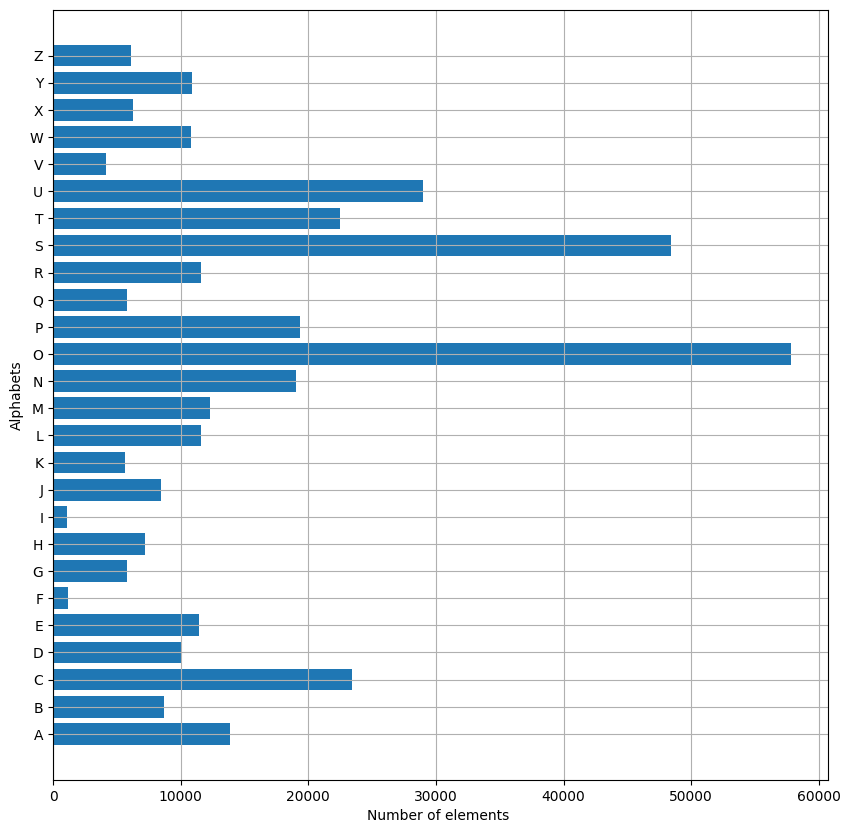

In [6]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

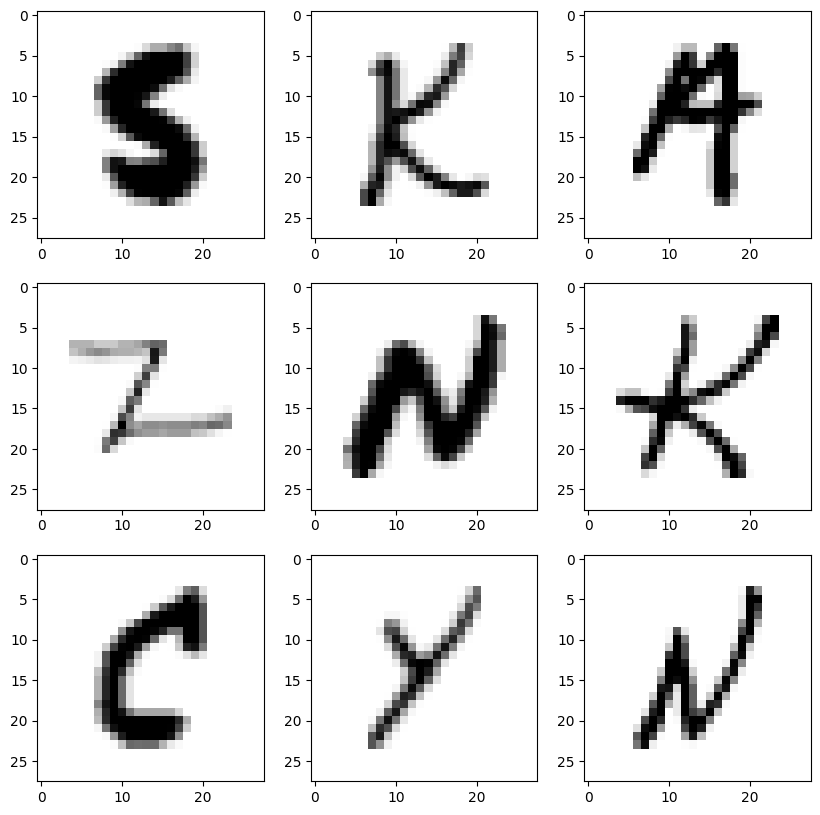

In [7]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [8]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)
#Now we reshape the train & test image dataset so that they can be put in the model.
#New shape of train data:  (297960, 28, 28, 1)
#New shape of train data:  (74490, 28, 28, 1)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [9]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [11]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=1,  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 651s 42ms/step - loss: 0.1650 - accuracy: 0.9551 - val_loss: 0.0789 - val_accuracy: 0.9778


In [12]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

C:\Users\PRATHIKSHA R PAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
history.history

{'loss': [0.16497167944908142],
 'accuracy': [0.9550912976264954],
 'val_loss': [0.07890431582927704],
 'val_accuracy': [0.9778091311454773]}

In [14]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9778091311454773]
The training accuracy is : [0.9550912976264954]
The validation loss is : [0.07890431582927704]
The training loss is : [0.16497167944908142]


In [15]:
pred=model.predict(test_X[:9])
print(test_X.shape)

1/1 [==============================] - 2s 2s/step
(74490, 28, 28, 1)


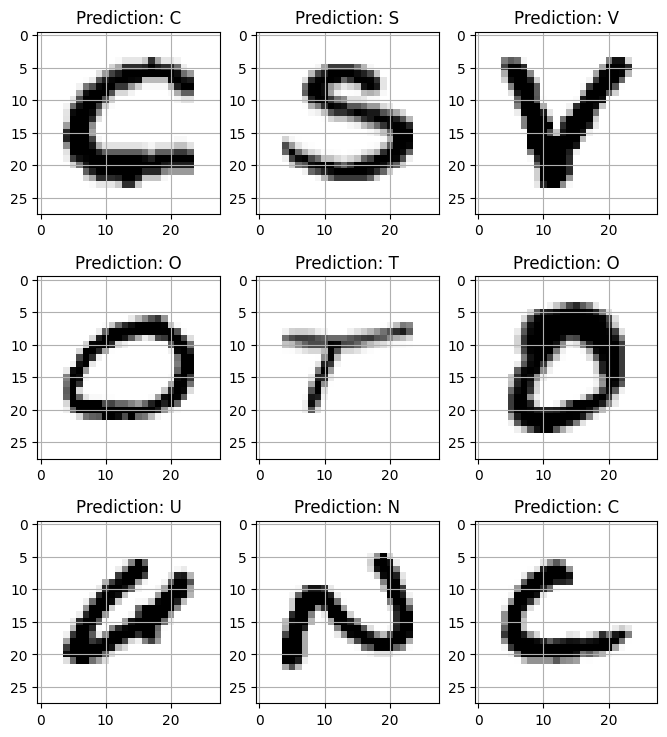

In [16]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [17]:
model.save(r'model_hand1.h5')

C:\Users\PRATHIKSHA R PAI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
img = cv2.imread(r'C:\Users\PRATHIKSHA R PAI\Downloads\img_b.jpg')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = word_dict[np.argmax(model.predict(img_final))]
cv2.putText(img, "Project _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Handwritten character recognition _ _ _ ', img)

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

1/1 [==============================] - 4s 4s/step


KeyboardInterrupt: 

In [16]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
import numpy as np
import tensorflow as tf


word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}  # Define your mapping


model = tf.keras.models.load_model('model_hand1.h5')


def predict_image(file_path):
    img = cv2.imread(file_path)
    img_copy = img.copy()
    img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
    img_final = cv2.resize(img_thresh, (28, 28))
    img_final = np.reshape(img_final, (1, 28, 28, 1))

    
    img_pred = word_dict[np.argmax(model.predict(img_final))]

    result_label.config(text=f"Prediction: {img_pred}")
    display_image(file_path)


def open_file_dialog():
    file_path = filedialog.askopenfilename()
    if file_path:
        predict_image(file_path)


def display_image(file_path):
    img = Image.open(file_path)
    img.thumbnail((200, 200))
    img = ImageTk.PhotoImage(img)

    image_label.config(image=img)
    image_label.image = img


root = tk.Tk()
root.title("Handwritten Character Recognition")


upload_button = tk.Button(root, text="Upload Image", command=open_file_dialog)
upload_button.pack(pady=10)

image_label = tk.Label(root)
image_label.pack()

result_label = tk.Label(root, text="Prediction: ")
result_label.pack(pady=10)


root.mainloop()


1/1 [==============================] - 1s 675ms/step
